In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import glob

In [3]:
DATA = "/content/drive/MyDrive/Capstone_Datasets/core"

In [4]:
for fname in ["JTSHIL.csv", "JTUHIL.csv"]:
    fpath = os.path.join(DATA, fname)
    print(fpath)

/content/drive/MyDrive/Capstone_Datasets/core/JTSHIL.csv
/content/drive/MyDrive/Capstone_Datasets/core/JTUHIL.csv


In [5]:
pd.read_csv("/content/drive/MyDrive/Capstone_Datasets/core/JTSHIL.csv")

,observation_date,JTSHIL
0,2000-12-01,5426
1,2001-01-01,5722
2,2001-02-01,5303
3,2001-03-01,5528
4,2001-04-01,5204
...,...,...
291,2025-03-01,5404
292,2025-04-01,5615
293,2025-05-01,5465
294,2025-06-01,5267


In [6]:
pd.read_csv("/content/drive/MyDrive/Capstone_Datasets/core/JTUHIL.csv")

,observation_date,JTUHIL
0,2000-12-01,4141
1,2001-01-01,5707
2,2001-02-01,4376
3,2001-03-01,5069
4,2001-04-01,5842
...,...,...
291,2025-03-01,4902
292,2025-04-01,5966
293,2025-05-01,6193
294,2025-06-01,6026


In [7]:
SECT = "/content/drive/MyDrive/Capstone_Datasets/sectors"
files = sorted(glob.glob(os.path.join(SECT, "*HIL.csv")))


In [8]:
print("Found", len(files), "sector CSVs:")
for f in files:
    df = pd.read_csv(f)
    print(os.path.basename(f), "→", len(df), "rows")

Found 10 sector CSVs:
JTU2300HIL.csv → 297 rows
JTU3000HIL.csv → 297 rows
JTU4200HIL.csv → 297 rows
JTU480099HIL.csv → 297 rows
JTU5100HIL.csv → 297 rows
JTU5200HIL.csv → 297 rows
JTU540099HIL.csv → 297 rows
JTU6000HIL.csv → 297 rows
JTU7000HIL.csv → 297 rows
JTU9000HIL.csv → 297 rows


In [9]:
# Only Level series:
hil_files = sorted(glob.glob(os.path.join(SECT, "*HIL.csv")))
hil_files

['/content/drive/MyDrive/Capstone_Datasets/sectors/JTU2300HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU3000HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU4200HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU480099HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU5100HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU5200HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU540099HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU6000HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU7000HIL.csv',
 '/content/drive/MyDrive/Capstone_Datasets/sectors/JTU9000HIL.csv']

In [10]:
def load_hil(path, nice_name=None):
    df = pd.read_csv(path)
    # FRED sector files usually have 'observation_date' and one value col.
    date_col = 'observation_date' if 'observation_date' in df.columns else 'DATE'
    val_col  = [c for c in df.columns if c != date_col][0]
    df = df[[date_col, val_col]].copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df.rename(columns={date_col:'month', val_col: (nice_name or val_col)}, inplace=True)
    return df

# Map file name (stem) -> human-friendly sector name
nice_map = {
    'JTU2300HIL':'Construction',
    'JTU3000HIL':'Manufacturing',
    'JTU4200HIL':'Wholesale_Trade',
    'JTU480099HIL':'Transportation_Warehousing',
    'JTU5100HIL':'Information',
    'JTU5200HIL':'Finance_Insurance',
    'JTU540099HIL':'Prof_Business_Services',
    'JTU6000HIL':'Education_Health',
    'JTU7000HIL':'Leisure_Hospitality',
    'JTU9000HIL':'Government',
}

# Merge all sectors on 'month'
df_sectors = None
for f in hil_files:
    stem = os.path.basename(f).replace('.csv','')
    name = nice_map.get(stem, stem)
    part = load_hil(f, name)
    df_sectors = part if df_sectors is None else df_sectors.merge(part, on='month', how='outer')

# Keep JOLTS period (Dec 2000 → latest) and sort
df_sectors = df_sectors.sort_values('month').reset_index(drop=True)

In [11]:
print("Sectors shape:", df_sectors.shape)

Sectors shape: (297, 11)


In [12]:
df_sectors.head(12)

,month,Construction,Manufacturing,Wholesale_Trade,Transportation_Warehousing,Information,Finance_Insurance,Prof_Business_Services,Education_Health,Leisure_Hospitality,Government
0,2000-12-01,263,359,94,109,78,142,799,371,680,234
1,2001-01-01,433,535,176,141,182,260,1269,550,830,307
2,2001-02-01,380,409,131,143,125,141,832,455,701,271
3,2001-03-01,556,461,127,122,100,147,918,502,942,244
4,2001-04-01,634,485,190,179,143,172,904,489,1199,254
5,2001-05-01,596,456,179,191,113,158,961,488,1142,376
6,2001-06-01,561,439,129,152,115,162,953,549,1048,474
7,2001-07-01,515,410,171,185,134,167,1043,618,1026,376
8,2001-08-01,390,381,164,158,118,157,1005,591,893,576
9,2001-09-01,409,352,159,155,96,113,802,624,837,458


In [13]:
REG = "/content/drive/MyDrive/Capstone_Datasets/regions"
files = sorted(glob.glob(os.path.join(REG, "*.csv")))
print("Found", len(files), "region CSVs")
for f in files:
    print(os.path.basename(f), "→", len(pd.read_csv(f)), "rows")

Found 6 region CSVs
JTSHIL.csv → 296 rows
JTU00MWHIL.csv → 297 rows
JTU00NEHIL.csv → 297 rows
JTU00SOHIL.csv → 297 rows
JTU00WEHIL.csv → 297 rows
JTUHIL.csv → 297 rows


In [14]:
MACRO = "/content/drive/MyDrive/Capstone_Datasets/macros"

def load_weekly_to_monthly(csv_path, nice_name):
    df = pd.read_csv(csv_path)
    # Detect the date/value column names
    date_col = 'DATE' if 'DATE' in df.columns else 'observation_date'
    val_col  = [c for c in df.columns if c != date_col][0]
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.rename(columns={date_col:'date', val_col:nice_name})
    # monthly average
    df_m = (df.set_index('date')
              .resample('ME')        # month end
              .mean()
              .reset_index()
              .rename(columns={'date':'month'}))
    return df_m

claims_init = load_weekly_to_monthly(os.path.join(MACRO, "ICSA.csv"), "claims_initial")
claims_cont = load_weekly_to_monthly(os.path.join(MACRO, "CCSA.csv"), "claims_continued")

print("Initial claims rows:", len(claims_init))
print(claims_init.head(), "\n")
print("Continued claims rows:", len(claims_cont))
print(claims_cont.head())

Initial claims rows: 705
       month  claims_initial
0 1967-01-31        209000.0
1 1967-02-28        229000.0
2 1967-03-31        260750.0
3 1967-04-30        263000.0
4 1967-05-31        235750.0 

Continued claims rows: 705
       month  claims_continued
0 1967-01-31         1118750.0
1 1967-02-28         1162500.0
2 1967-03-31         1243250.0
3 1967-04-30         1281000.0
4 1967-05-31         1277500.0


In [15]:
df_with_claims = (df_sectors
                  .merge(claims_init, on='month', how='left')
                  .merge(claims_cont, on='month', how='left'))

In [16]:
# Helper: force a column to month-end timestamps
def to_month_end(df, col='month'):
    df = df.copy()
    df[col] = pd.to_datetime(df[col]).dt.to_period('M').dt.to_timestamp('M')
    return df

# Normalize dates
df_sectors_m = to_month_end(df_sectors, 'month')
claims_init_m = to_month_end(claims_init, 'month')
claims_cont_m = to_month_end(claims_cont, 'month')

# Re-merge
df_with_claims = (df_sectors_m
                  .merge(claims_init_m, on='month', how='left')
                  .merge(claims_cont_m, on='month', how='left'))

In [17]:
print("Shape after month-end align + merge:", df_with_claims.shape)

Shape after month-end align + merge: (297, 13)


In [18]:
df_with_claims[['month','claims_initial','claims_continued']].head(12)

,month,claims_initial,claims_continued
0,2000-12-31,346000.0,2306400.0
1,2001-01-31,340000.0,2395750.0
2,2001-02-28,371250.0,2486500.0
3,2001-03-31,387200.0,2585400.0
4,2001-04-30,396750.0,2697250.0
5,2001-05-31,394500.0,2819250.0
6,2001-06-30,397200.0,2947400.0
7,2001-07-31,398000.0,3030750.0
8,2001-08-31,398000.0,3120000.0
9,2001-09-30,435000.0,3262200.0


In [19]:
df_with_claims[['month','claims_initial','claims_continued']].tail(5)

,month,claims_initial,claims_continued
292,2025-04-30,226000.0,1872750.0
293,2025-05-31,234000.0,1906000.0
294,2025-06-30,241250.0,1952750.0
295,2025-07-31,221250.0,1950250.0
296,2025-08-31,230000.0,1942600.0


In [20]:
path_indeed = f"{MACRO}/IHLIDXUS.csv"
indeed_raw = pd.read_csv(path_indeed)

# FRED files usually have DATE + <seriesID> columns
date_col = 'DATE' if 'DATE' in indeed_raw.columns else 'observation_date'
val_col  = [c for c in indeed_raw.columns if c != date_col][0]

indeed_m = (
    indeed_raw
      .rename(columns={date_col: 'date', val_col: 'indeed_index'})
)

indeed_m['date'] = pd.to_datetime(indeed_m['date'])

# monthly average -> one row per calendar month (use month-end for alignment)
indeed_m = (
    indeed_m
      .set_index('date')
      .resample('M')
      .mean()
      .reset_index()
      .rename(columns={'date': 'month'})
)

# Sanity check: no duplicate months now
assert not indeed_m['month'].duplicated().any(), "Still have duplicate months in Indeed!"

# Merge (this keeps your base row count the same)
base_rows = len(df_with_claims)
df_with_postings = df_with_claims.merge(indeed_m, on='month', how='left')
print("Rows before merge:", base_rows, " | Rows after merge:", len(df_with_postings))

Rows before merge: 297  | Rows after merge: 297


/tmp/ipython-input-3402398315.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [21]:
df_with_postings[['month','indeed_index']].head(12)

,month,indeed_index
0,2000-12-31,NaN
1,2001-01-31,NaN
2,2001-02-28,NaN
3,2001-03-31,NaN
4,2001-04-30,NaN
5,2001-05-31,NaN
6,2001-06-30,NaN
7,2001-07-31,NaN
8,2001-08-31,NaN
9,2001-09-30,NaN


In [22]:
df_with_postings[['month','indeed_index']].tail(12)

,month,indeed_index
285,2024-09-30,112.817000
286,2024-10-31,110.448065
287,2024-11-30,109.841667
288,2024-12-31,111.301290
289,2025-01-31,110.756452
290,2025-02-28,110.141429
291,2025-03-31,108.973871
292,2025-04-30,107.814333
293,2025-05-31,106.681935
294,2025-06-30,105.960000


In [23]:
# Optional: show from the first non-null month
mask = df_with_postings['indeed_index'].notna()
if mask.any():
    first_non_null = df_with_postings.loc[mask, ['month','indeed_index']].head(3)
    print("First non-null Indeed months:\n", first_non_null)

First non-null Indeed months:
          month  indeed_index
238 2020-10-31     90.755455
239 2020-11-30     93.364000
240 2020-12-31     95.039677


In [24]:
# Helper to clean and monthly-average any macro CSV
def load_macro(file, colname):
    df = pd.read_csv(file)
    date_col = 'DATE' if 'DATE' in df.columns else 'observation_date'
    val_col  = [c for c in df.columns if c != date_col][0]
    df = (
        df.rename(columns={date_col:'month', val_col:colname})
          .assign(month=lambda d: pd.to_datetime(d['month']))
          .set_index('month')
          .resample('M').mean()      # ensure one value per month
          .reset_index()
    )
    return df

# Load each indicator
indpro  = load_macro(f"{MACRO}/INDPRO.csv",  'indpro_index')
sent    = load_macro(f"{MACRO}/UMCSENT.csv", 'consumer_sentiment')
sp500   = load_macro(f"{MACRO}/SP500.csv",   'sp500_index')

# Merge sequentially onto the previous DataFrame (df_with_postings)
df_macro = (
    df_with_postings
      .merge(indpro,  on='month', how='left')
      .merge(sent,    on='month', how='left')
      .merge(sp500,   on='month', how='left')
)

/tmp/ipython-input-1251738575.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean()      # ensure one value per month
/tmp/ipython-input-1251738575.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean()      # ensure one value per month
/tmp/ipython-input-1251738575.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean()      # ensure one value per month


In [25]:
print("Shape after adding macros:", df_macro.shape)

Shape after adding macros: (297, 17)


In [26]:
df_macro[['month','indpro_index','consumer_sentiment','sp500_index']].tail(8)

,month,indpro_index,consumer_sentiment,sp500_index
289,2025-01-31,102.8805,71.7,5979.515500
290,2025-02-28,103.8705,64.7,6038.690000
291,2025-03-31,103.5408,57.0,5683.983333
292,2025-04-30,103.6224,52.2,5369.495714
293,2025-05-31,103.6570,52.2,5810.919524
294,2025-06-30,104.2115,60.7,6029.951500
295,2025-07-31,103.8194,61.7,6296.498182
296,2025-08-31,103.9203,58.2,6408.949524


In [27]:
df_fe = df_macro.copy()

# Calendar helpers
df_fe['month_name'] = df_fe['month'].dt.strftime('%b')   # Jan, Feb, ...
df_fe['quarter']    = df_fe['month'].dt.to_period('Q').astype(str)

# Build total hires from your sector columns (edit names if needed)
sector_cols = [
    'Construction','Manufacturing','Wholesale_Trade','Transportation_Warehousing',
    'Information','Finance_Insurance','Prof_Business_Services','Education_Health',
    'Leisure_Hospitality','Government'
]
df_fe['hires_total'] = df_fe[sector_cols].sum(axis=1)

# Lags & smoothing
df_fe['hires_total_lag1']  = df_fe['hires_total'].shift(1)
df_fe['hires_total_lag12'] = df_fe['hires_total'].shift(12)
df_fe['hires_ma3']         = df_fe['hires_total'].rolling(3).mean()

print("Shape with features:", df_fe.shape)
df_fe[['month','hires_total','hires_total_lag1','hires_total_lag12','hires_ma3','month_name','quarter']].head(15)

Shape with features: (297, 23)


,month,hires_total,hires_total_lag1,hires_total_lag12,hires_ma3,month_name,quarter
0,2000-12-31,3129,NaN,NaN,NaN,Dec,2000Q4
1,2001-01-31,4683,3129.0,NaN,NaN,Jan,2001Q1
2,2001-02-28,3588,4683.0,NaN,3800.000000,Feb,2001Q1
3,2001-03-31,4119,3588.0,NaN,4130.000000,Mar,2001Q1
4,2001-04-30,4649,4119.0,NaN,4118.666667,Apr,2001Q2
5,2001-05-31,4660,4649.0,NaN,4476.000000,May,2001Q2
6,2001-06-30,4582,4660.0,NaN,4630.333333,Jun,2001Q2
7,2001-07-31,4645,4582.0,NaN,4629.000000,Jul,2001Q3
8,2001-08-31,4433,4645.0,NaN,4553.333333,Aug,2001Q3
9,2001-09-30,4005,4433.0,NaN,4361.000000,Sep,2001Q3


In [28]:
import numpy as np

dfX = df_fe.copy()

# --- 1) Year-over-year growth (YoY) for key drivers ---
yoy_cols = [
    'claims_initial','claims_continued','indeed_index',
    'indpro_index','consumer_sentiment','sp500_index'
]
for c in yoy_cols:
    if c in dfX.columns:
        dfX[c + '_yoy'] = 100 * (dfX[c] / dfX[c].shift(12) - 1)

# --- 2) Month dummies (seasonality controls for NSA modeling/plots) ---
dums = pd.get_dummies(dfX['month_name'], prefix='mo')
dfX = pd.concat([dfX, dums], axis=1)

# --- 3) Quick correlation view (with hires_total) ---
corr_targets = ['hires_total',
                'claims_initial','claims_continued',
                'indeed_index','indpro_index','consumer_sentiment','sp500_index',
                'claims_initial_yoy','claims_continued_yoy',
                'indeed_index_yoy','indpro_index_yoy','consumer_sentiment_yoy','sp500_index_yoy']
corr_df = dfX[corr_targets].corr(numeric_only=True)

# Sort correlations by absolute value vs hires_total (drop self-correlation)
corr_sorted = (corr_df['hires_total']
               .drop(labels=['hires_total'])
               .dropna()
               .reindex(corr_df.index, fill_value=np.nan))
corr_sorted = corr_sorted.reindex(corr_sorted.abs().sort_values(ascending=False).index)

print("Added YoY columns & month dummies. Current shape:", dfX.shape)

Added YoY columns & month dummies. Current shape: (297, 41)


In [29]:
print("\nTop correlations with hires_total (absolute):\n")
corr_sorted.head(10).round(3)


Top correlations with hires_total (absolute):



,hires_total
indeed_index,0.469
indpro_index,0.426
sp500_index_yoy,-0.331
indeed_index_yoy,0.276
sp500_index,-0.273
consumer_sentiment_yoy,-0.181
claims_continued_yoy,0.173
indpro_index_yoy,0.105
claims_initial,-0.062
claims_initial_yoy,0.036


In [30]:
# Peek at new columns
new_cols = [c for c in dfX.columns if c.endswith('_yoy')] + [c for c in dfX.columns if c.startswith('mo_')]
print("\nSample of new columns:")
new_cols[:12]


Sample of new columns:


['claims_initial_yoy',
 'claims_continued_yoy',
 'indeed_index_yoy',
 'indpro_index_yoy',
 'consumer_sentiment_yoy',
 'sp500_index_yoy',
 'mo_Apr',
 'mo_Aug',
 'mo_Dec',
 'mo_Feb',
 'mo_Jan',
 'mo_Jul']

In [31]:
dfX[['month','hires_total','indeed_index','indeed_index_yoy','indpro_index','indpro_index_yoy','mo_Jan','mo_Jun','mo_Dec']].head(15)

,month,hires_total,indeed_index,indeed_index_yoy,indpro_index,indpro_index_yoy,mo_Jan,mo_Jun,mo_Dec
0,2000-12-31,3129,NaN,NaN,92.3457,NaN,False,False,True
1,2001-01-31,4683,NaN,NaN,91.8908,NaN,True,False,False
2,2001-02-28,3588,NaN,NaN,91.2851,NaN,False,False,False
3,2001-03-31,4119,NaN,NaN,91.0585,NaN,False,False,False
4,2001-04-30,4649,NaN,NaN,90.7384,NaN,False,False,False
5,2001-05-31,4660,NaN,NaN,90.2607,NaN,False,False,False
6,2001-06-30,4582,NaN,NaN,89.7811,NaN,False,True,False
7,2001-07-31,4645,NaN,NaN,89.2352,NaN,False,False,False
8,2001-08-31,4433,NaN,NaN,89.1570,NaN,False,False,False
9,2001-09-30,4005,NaN,NaN,88.6749,NaN,False,False,False


In [32]:
# 1) Load regions (handles any 1-value-column CSVs in the folder)
REG = "/content/drive/MyDrive/Capstone_Datasets/regions"

def load_region(path, nice_name=None):
    df = pd.read_csv(path)
    date_col = 'DATE' if 'DATE' in df.columns else 'observation_date'
    val_col  = [c for c in df.columns if c != date_col][0]
    df = (df.rename(columns={date_col:'month', val_col:(nice_name or val_col)})
            .assign(month=lambda d: pd.to_datetime(d['month']).dt.to_period('M').dt.to_timestamp('M'))
            .sort_values('month'))
    return df

# Try to infer names from filenames; rename nicely
region_files = sorted(glob.glob(os.path.join(REG, "*.csv")))
name_map = {
    'midwest':'Hires_Midwest',
    'northeast':'Hires_Northeast',
    'south':'Hires_South',
    'west':'Hires_West'
}
regions_list = []
for f in region_files:
    fname = os.path.basename(f).lower()
    nice = None
    for key, nm in name_map.items():
        if key in fname:
            nice = nm
            break
    regions_list.append(load_region(f, nice_name=nice))

# 2) Merge regions onto your feature frame (dfX from previous step)
df_master = dfX.copy()
for r in regions_list:
    df_master = df_master.merge(r, on='month', how='left')

# 3) Keep only rows where lagged features exist (drop first 12 months for modeling)
before = df_master.shape
df_master = df_master[df_master['hires_total_lag12'].notna()].reset_index(drop=True)
after = df_master.shape

# 4) Save
OUTDIR = "/content/drive/MyDrive/Capstone_Datasets/processed"
os.makedirs(OUTDIR, exist_ok=True)
out_path = os.path.join(OUTDIR, "hirecast_master.csv")
df_master.to_csv(out_path, index=False)

print("Before trim:", before, "| After trim:", after)
print("Date range:", df_master['month'].min().date(), "→", df_master['month'].max().date())
print("Columns:", len(df_master.columns))
print("Saved to:", out_path)

# Peek at key columns
keep_cols_preview = [
    'month','hires_total','hires_total_lag1','hires_total_lag12','hires_ma3',
    'claims_initial','claims_continued','indeed_index',
    'indpro_index','consumer_sentiment','sp500_index',
]
region_cols = [c for c in df_master.columns if c.startswith('Hires_')]
print("\nRegion cols:", region_cols)
print("\nPreview:\n", df_master[keep_cols_preview + region_cols][:8].to_string(index=False))


Before trim: (297, 47) | After trim: (285, 47)
Date range: 2001-12-31 → 2025-08-31
Columns: 47
Saved to: /content/drive/MyDrive/Capstone_Datasets/processed/hirecast_master.csv

Region cols: []

Preview:
      month  hires_total  hires_total_lag1  hires_total_lag12   hires_ma3  claims_initial  claims_continued  indeed_index  indpro_index  consumer_sentiment  sp500_index
2001-12-31         2713            3106.0             3129.0 3298.000000        416800.0         3589400.0           NaN       87.8518                88.8          NaN
2002-01-31         3977            2713.0             4683.0 3265.333333        408500.0         3550500.0           NaN       88.4634                93.0          NaN
2002-02-28         3161            3977.0             3588.0 3283.666667        399000.0         3554250.0           NaN       88.4578                90.7          NaN
2002-03-31         3483            3161.0             4119.0 3540.333333        415400.0         3610800.0           NaN    

In [33]:
import matplotlib.pyplot as plt
REG_PATH = "/content/drive/MyDrive/Capstone_Datasets/regions"  # adjust if needed

def load_region_csv(fname, colname):
    """Load FRED-format CSV (NSA hires)"""
    df = pd.read_csv(f"{REG_PATH}/{fname}")
    df.columns = ['month', colname]
    df['month'] = pd.to_datetime(df['month'])
    return df

# -----------------------------
# LOAD NATIONAL (NSA) + REGIONS
# -----------------------------
nat = load_region_csv("JTUHIL.csv", "Nat_Total_NSA")  # note the space in file name
ne = load_region_csv("JTU00NEHIL.csv", "Hires_NE")
mw = load_region_csv("JTU00MWHIL.csv", "Hires_MW")
so = load_region_csv("JTU00SOHIL.csv", "Hires_SO")
we = load_region_csv("JTU00WEHIL.csv", "Hires_WE")

# -----------------------------
# MERGE ALL TOGETHER
# -----------------------------
df = nat.merge(ne, on="month", how="inner") \
        .merge(mw, on="month", how="inner") \
        .merge(so, on="month", how="inner") \
        .merge(we, on="month", how="inner")

# compute sum of regional hires and % gap vs national
df["Regions_Sum"] = df[["Hires_NE","Hires_MW","Hires_SO","Hires_WE"]].sum(axis=1)
df["gap_%"] = (df["Regions_Sum"] - df["Nat_Total_NSA"]) / df["Nat_Total_NSA"] * 100

print("Date range:", df["month"].min().strftime("%Y-%m"), "→", df["month"].max().strftime("%Y-%m"))
print("Mean % gap (Sum of Regions vs National):", round(df["gap_%"].mean(), 2))
df.tail()



Date range: 2000-12 → 2025-08
Mean % gap (Sum of Regions vs National): 0.0


,month,Nat_Total_NSA,Hires_NE,Hires_MW,Hires_SO,Hires_WE,Regions_Sum,gap_%
292,2025-04-01,5966,910,1336,2321,1398,5965,-0.016762
293,2025-05-01,6193,1063,1417,2233,1480,6193,0.000000
294,2025-06-01,6026,1053,1317,2285,1371,6026,0.000000
295,2025-07-01,5758,923,1214,2241,1381,5759,0.017367
296,2025-08-01,5654,855,1221,2288,1288,5652,-0.035373


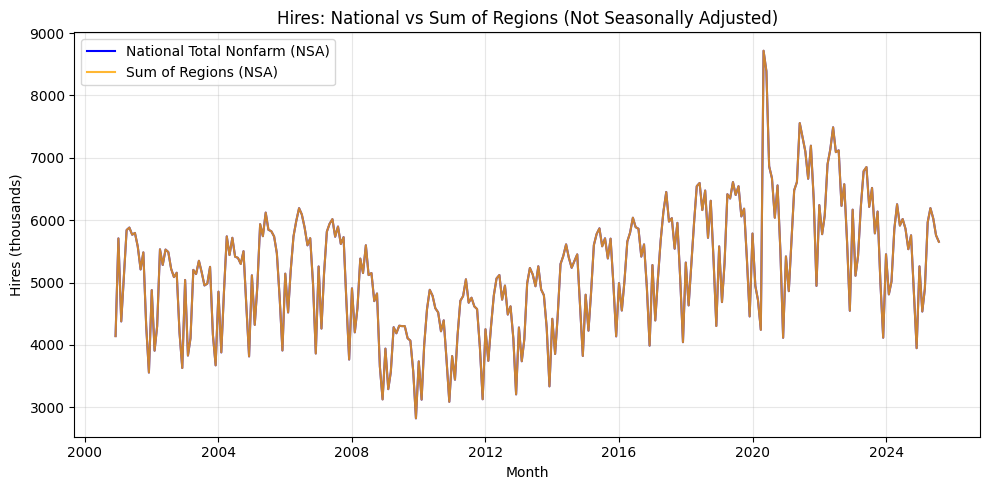

In [34]:
# -----------------------------
# PLOT 1 – National vs Sum of Regions
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(df["month"], df["Nat_Total_NSA"], label="National Total Nonfarm (NSA)", color="blue")
plt.plot(df["month"], df["Regions_Sum"], label="Sum of Regions (NSA)", color="orange", alpha=0.8)
plt.title("Hires: National vs Sum of Regions (Not Seasonally Adjusted)")
plt.xlabel("Month"); plt.ylabel("Hires (thousands)")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

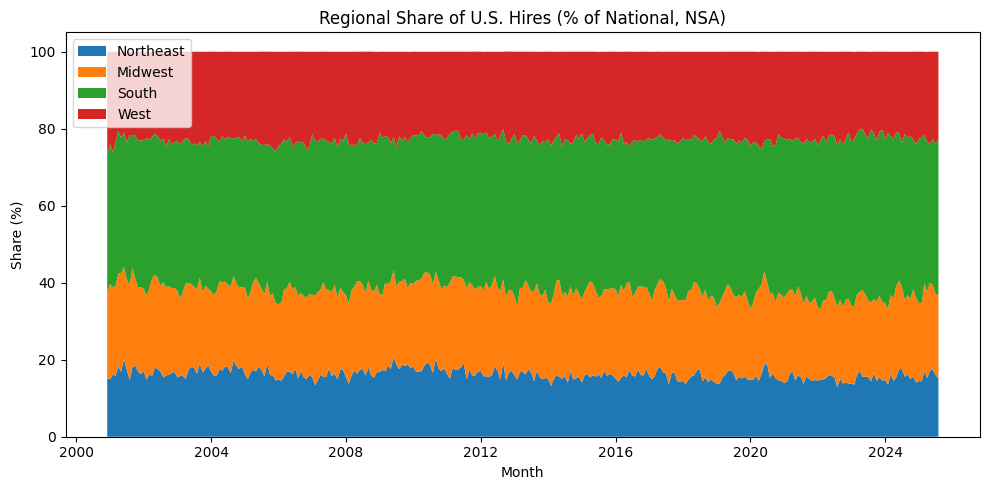

In [35]:
# -----------------------------
# PLOT 2 – Regional Share
# -----------------------------
share = df.copy()
for r in ["Hires_NE","Hires_MW","Hires_SO","Hires_WE"]:
    share[r+"_pct"] = share[r] / share["Nat_Total_NSA"] * 100

plt.figure(figsize=(10,5))
plt.stackplot(share["month"],
              share["Hires_NE_pct"],
              share["Hires_MW_pct"],
              share["Hires_SO_pct"],
              share["Hires_WE_pct"],
              labels=["Northeast","Midwest","South","West"],
              colors=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.title("Regional Share of U.S. Hires (% of National, NSA)")
plt.xlabel("Month"); plt.ylabel("Share (%)")
plt.legend(loc="upper left"); plt.tight_layout()
plt.show()

In [36]:
from pathlib import Path

PROC = "/content/drive/MyDrive/Capstone_Datasets/processed"

# 1) Load the latest master you saved (with regions); if yours is different, adjust the filename
src = f"{PROC}/hirecast_master_with_regions.csv"
df = pd.read_csv(src, parse_dates=["month"])

# 2) Drop region columns (and any helper columns from the region check)
region_cols = [c for c in df.columns if c in ["Hires_NE","Hires_MW","Hires_SO","Hires_WE","regions_sum","gap_vs_regions_sum_%","gap_%","Regions_Sum"]]
df_no_regions = df.drop(columns=region_cols, errors="ignore")

# 3) Minor tidy: keep a stable column order (month first)
cols = ["month"] + [c for c in df_no_regions.columns if c != "month"]
df_no_regions = df_no_regions[cols]

# 4) Sanity summaries
print("Shape (no regions):", df_no_regions.shape)
print("Date range:", df_no_regions["month"].min().date(), "→", df_no_regions["month"].max().date())
print("\nColumns:", df_no_regions.columns.tolist())
print("\nAny NaNs by column (top 15):")
print(df_no_regions.isna().sum().sort_values(ascending=False).head(15))

# 5) Save the versioned clean master
out = f"{PROC}/hirecast_master_v2_noregions.csv"
Path(PROC).mkdir(parents=True, exist_ok=True)
df_no_regions.to_csv(out, index=False)
print("\nSaved:", out)

# 6) Quick peek
display(df_no_regions.head(8))


Shape (no regions): (285, 41)
Date range: 2001-12-31 → 2025-08-31

Columns: ['month', 'Construction', 'Manufacturing', 'Wholesale_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Prof_Business_Services', 'Education_Health', 'Leisure_Hospitality', 'Government', 'claims_initial', 'claims_continued', 'indeed_index', 'indpro_index', 'consumer_sentiment', 'sp500_index', 'month_name', 'quarter', 'hires_total', 'hires_total_lag1', 'hires_total_lag12', 'hires_ma3', 'claims_initial_yoy', 'claims_continued_yoy', 'indeed_index_yoy', 'indpro_index_yoy', 'consumer_sentiment_yoy', 'sp500_index_yoy', 'mo_Apr', 'mo_Aug', 'mo_Dec', 'mo_Feb', 'mo_Jan', 'mo_Jul', 'mo_Jun', 'mo_Mar', 'mo_May', 'mo_Nov', 'mo_Oct', 'mo_Sep']

Any NaNs by column (top 15):
sp500_index_yoy               238
indeed_index_yoy              238
sp500_index                   226
indeed_index                  226
Transportation_Warehousing      0
Construction                    0
Manufacturing              

,month,Construction,Manufacturing,Wholesale_Trade,Transportation_Warehousing,Information,Finance_Insurance,Prof_Business_Services,Education_Health,Leisure_Hospitality,...,mo_Dec,mo_Feb,mo_Jan,mo_Jul,mo_Jun,mo_Mar,mo_May,mo_Nov,mo_Oct,mo_Sep
0,2001-12-31,287,255,88,103,75,110,633,337,602,...,True,False,False,False,False,False,False,False,False,False
1,2002-01-31,373,398,193,143,114,198,1004,566,694,...,False,False,True,False,False,False,False,False,False,False
2,2002-02-28,335,378,120,137,79,104,717,416,647,...,False,True,False,False,False,False,False,False,False,False
3,2002-03-31,416,366,145,111,89,107,820,417,784,...,False,False,False,False,False,True,False,False,False,False
4,2002-04-30,597,460,182,174,112,167,992,504,1015,...,False,False,False,False,False,False,False,False,False,False
5,2002-05-31,507,466,163,135,81,157,860,461,1001,...,False,False,False,False,False,False,True,False,False,False
6,2002-06-30,542,440,169,149,94,153,812,582,947,...,False,False,False,False,True,False,False,False,False,False
7,2002-07-31,542,459,187,169,97,152,924,588,889,...,False,False,False,True,False,False,False,False,False,False


In [37]:
# Load the frozen master (no regions)
PROC = "/content/drive/MyDrive/Capstone_Datasets/processed"
df = pd.read_csv(f"{PROC}/hirecast_master_v2_noregions.csv", parse_dates=["month"])
df = df.sort_values("month").reset_index(drop=True)

# ---- sector columns we’ll use throughout ----
sector_cols = [
    "Construction","Manufacturing","Wholesale_Trade","Transportation_Warehousing",
    "Information","Finance_Insurance","Prof_Business_Services",
    "Education_Health","Leisure_Hospitality","Government"
]

# total check (for share plots)
df["sector_sum"] = df[sector_cols].sum(axis=1)

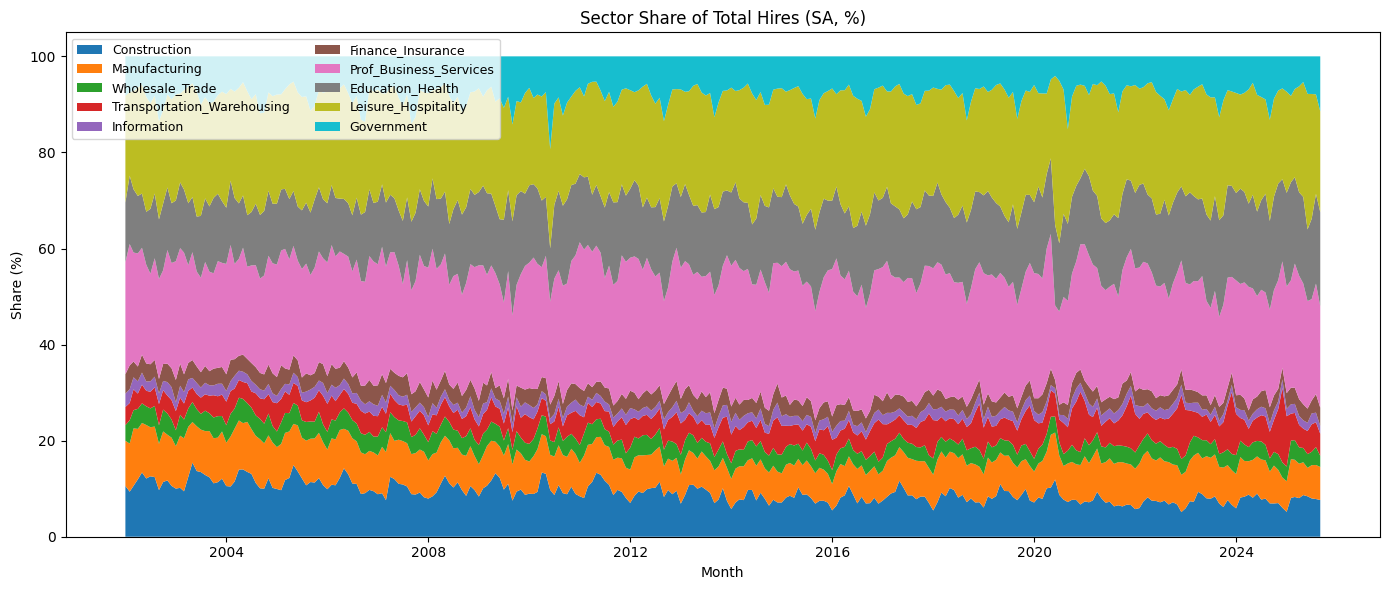

In [38]:
# =============================
# 1) Stacked area: sector share
# =============================
share = (df[sector_cols].div(df["sector_sum"], axis=0) * 100)

plt.figure(figsize=(14,6))
plt.stackplot(df["month"], share.T, labels=sector_cols)
plt.legend(loc="upper left", ncol=2, fontsize=9)
plt.title("Sector Share of Total Hires (SA, %)")
plt.ylabel("Share (%)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["legend.frameon"] = False
plt.rcParams["grid.alpha"] = 0.3

PATH = "/content/drive/MyDrive/Capstone_Datasets/processed/hirecast_master_v2_noregions.csv"
df = (pd.read_csv(PATH, parse_dates=["month"])
        .sort_values("month")
        .reset_index(drop=True))

# sectors (you can add/remove here)
sector_cols = [
    "Prof_Business_Services","Leisure_Hospitality","Education_Health",
    "Government","Manufacturing","Construction",
    "Transportation_Warehousing","Wholesale_Trade","Finance_Insurance","Information"
]

df["total_from_sectors"] = df[sector_cols].sum(axis=1)

# % shares by sector (vs total from the same set of sectors)
share = df[["month"] + sector_cols].copy()
share[sector_cols] = (share[sector_cols]
                      .div(share[sector_cols].sum(axis=1), axis=0)) * 100.0


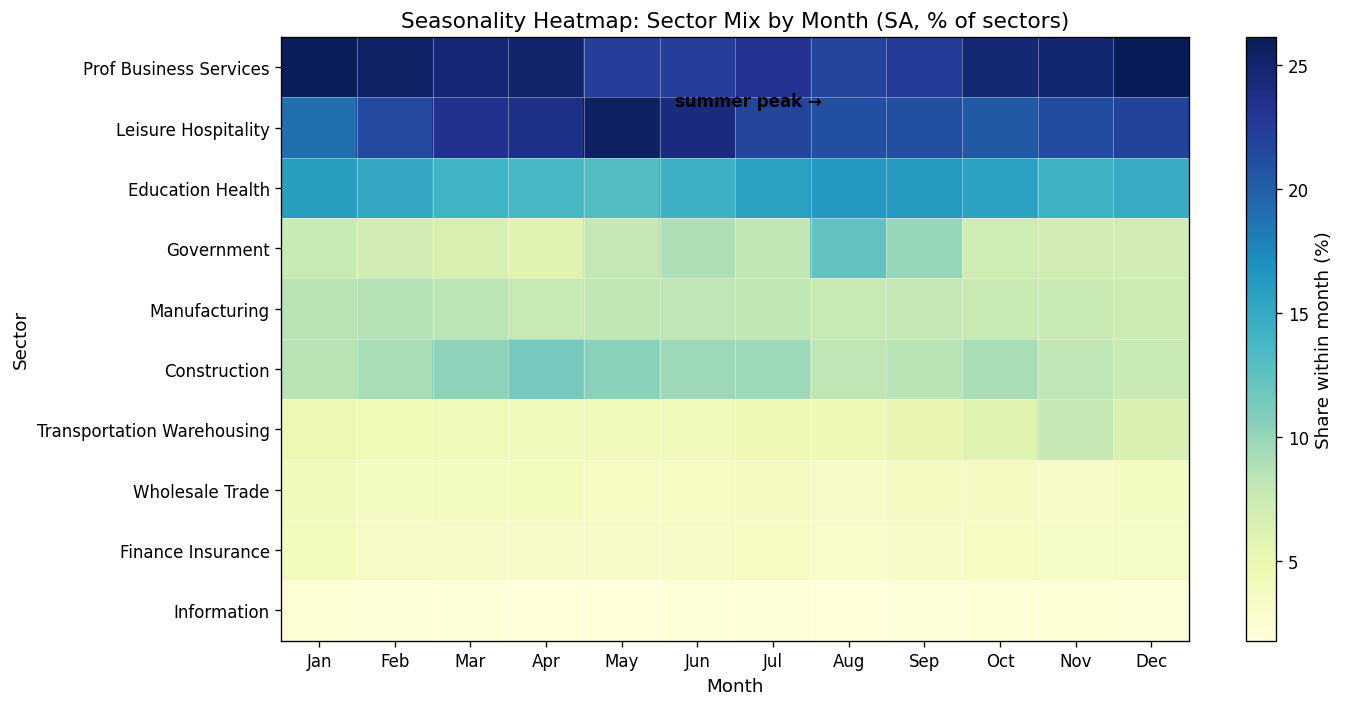

In [45]:
# Month name/category (ensure)
share["month_name"] = share["month"].dt.strftime("%b")
share["month_num"]  = share["month"].dt.month

# average sector mix BY month (within-month %)
season = (share.groupby("month_num")[sector_cols].mean()
               .reindex(range(1,13)))  # Jan..Dec
season.index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))
im = plt.imshow(season.values.T, aspect="auto", cmap="YlGnBu")

plt.title("Seasonality Heatmap: Sector Mix by Month (SA, % of sectors)")
plt.xlabel("Month")
plt.ylabel("Sector")
plt.xticks(ticks=np.arange(12), labels=season.index)
plt.yticks(ticks=np.arange(len(sector_cols)),
           labels=[c.replace("_"," ") for c in sector_cols])

# grid lines
for x in range(12):
    plt.axvline(x-0.5, color="white", lw=0.5, alpha=0.4)
for y in range(len(sector_cols)):
    plt.axhline(y-0.5, color="white", lw=0.5, alpha=0.4)

# annotate “summer peak” above May/Jun (Leisure row)
leisure_row = sector_cols.index("Leisure_Hospitality")
plt.text(4.7, leisure_row-0.35, "summer peak →", color="black", fontsize=10, weight="bold")

cbar = plt.colorbar(im)
cbar.set_label("Share within month (%)")
plt.tight_layout()
plt.show()


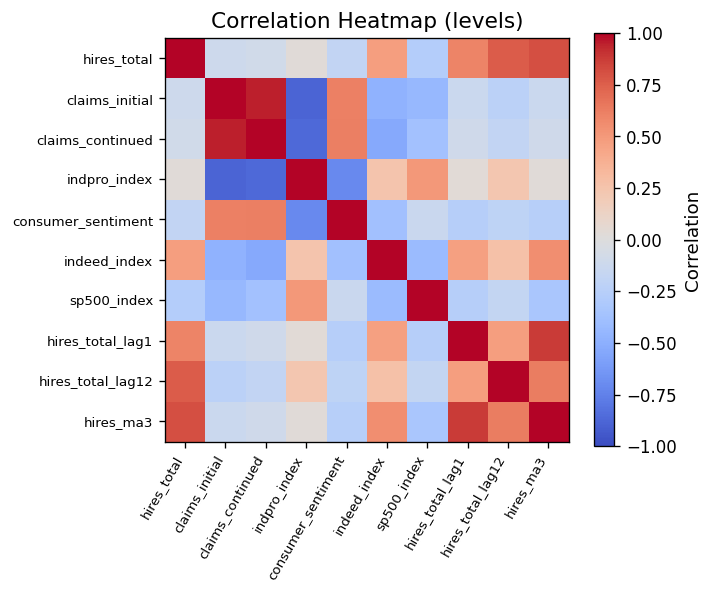

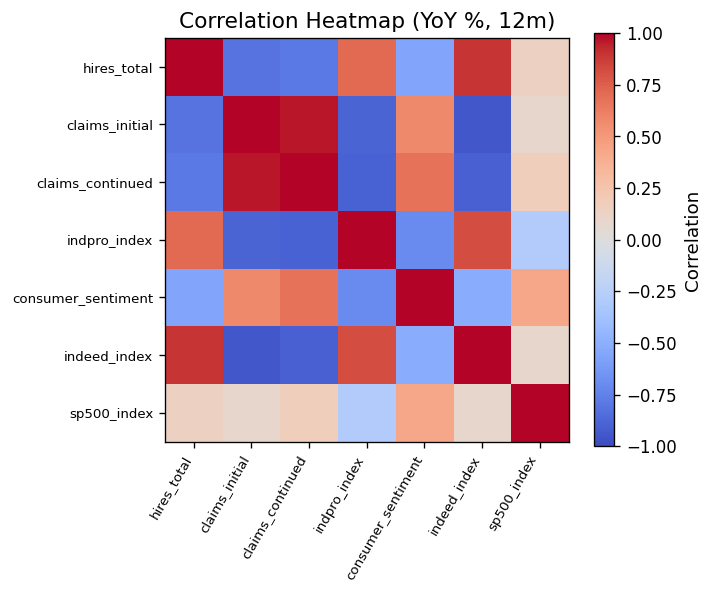

In [46]:
# pick variables for correlation
corr_cols_levels = [
    "hires_total","claims_initial","claims_continued","indpro_index",
    "consumer_sentiment","indeed_index","sp500_index",
    "hires_total_lag1","hires_total_lag12","hires_ma3"
]
corr_df = df[corr_cols_levels].copy().dropna()

# --- levels
corr_mat = corr_df.corr()

plt.figure(figsize=(6,5))
plt.title("Correlation Heatmap (levels)")
im = plt.imshow(corr_mat, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=60, ha="right", fontsize=8)
plt.yticks(range(len(corr_mat.index)), corr_mat.index, fontsize=8)
plt.colorbar(im, label="Correlation")
plt.tight_layout()
plt.show()

# --- YoY (pct change vs 12 months ago) for macro drivers and hires
yoy_cols = ["hires_total","claims_initial","claims_continued","indpro_index",
            "consumer_sentiment","indeed_index","sp500_index"]
yoy = df[yoy_cols].pct_change(12)*100  # YoY %
yoy = yoy.dropna()

plt.figure(figsize=(6,5))
plt.title("Correlation Heatmap (YoY %, 12m)")
im2 = plt.imshow(yoy.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(yoy.columns)), yoy.columns, rotation=60, ha="right", fontsize=8)
plt.yticks(range(len(yoy.columns)), yoy.columns, fontsize=8)
plt.colorbar(im2, label="Correlation")
plt.tight_layout()
plt.show()


In [48]:
# Create the combined "Core IT" series
df["IT_Core"] = df["Information"] + df["Prof_Business_Services"]

# IT share of total hires (helps show importance over time)
df["IT_Core_share"] = 100 * df["IT_Core"] / df["hires_total"]


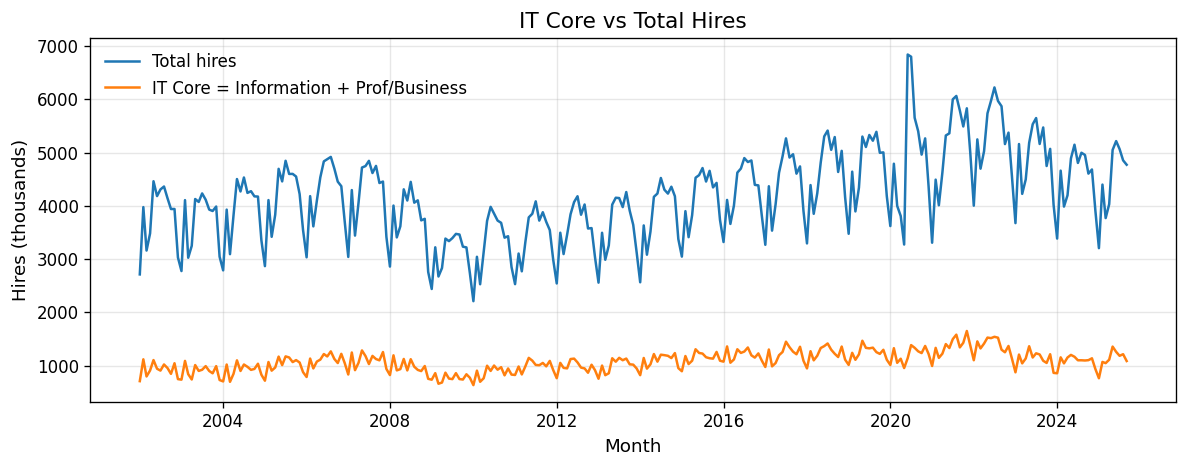

In [51]:
# (a) IT Core vs total hires
plt.figure(figsize=(10,4))
plt.plot(df["month"], df["hires_total"], label="Total hires")
plt.plot(df["month"], df["IT_Core"], label="IT Core = Information + Prof/Business")
plt.title("IT Core vs Total Hires")
plt.xlabel("Month"); plt.ylabel("Hires (thousands)"); plt.legend(); plt.grid(alpha=.3); plt.tight_layout(); plt.show()

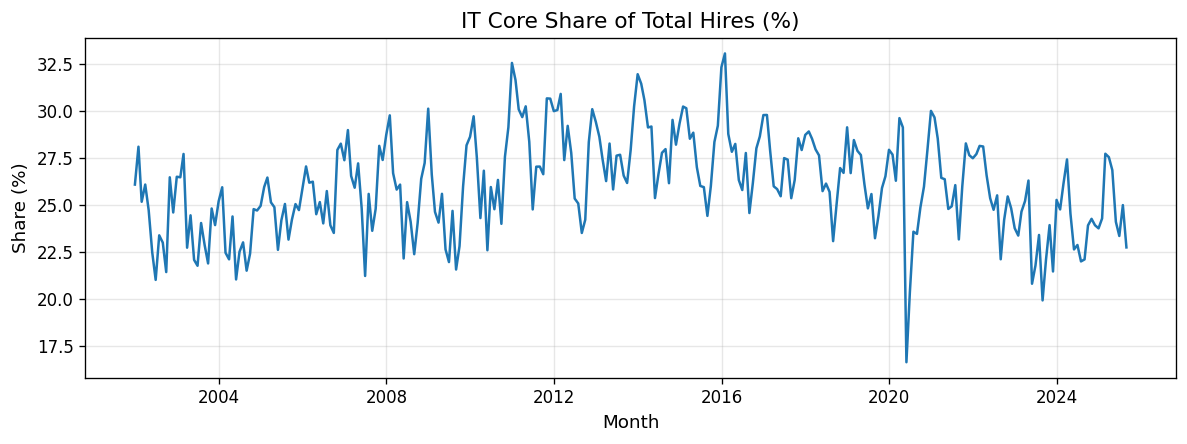

In [52]:
# (b) IT Core share %
plt.figure(figsize=(10,3.8))
plt.plot(df["month"], df["IT_Core_share"])
plt.title("IT Core Share of Total Hires (%)")
plt.xlabel("Month"); plt.ylabel("Share (%)"); plt.grid(alpha=.3); plt.tight_layout(); plt.show()

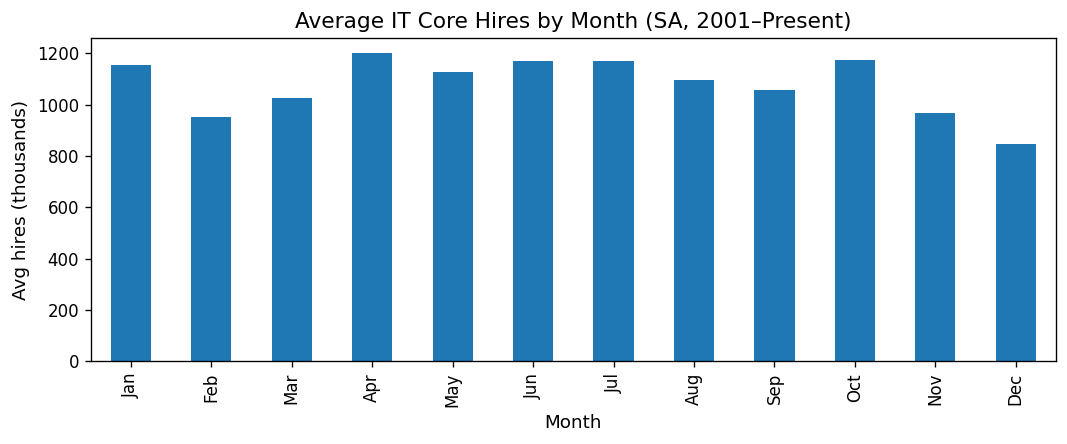

In [53]:
# (c) Seasonality of IT Core (average by month)
it_by_month = (df.assign(mo=df["month"].dt.month_name().str.slice(0,3))
                 .groupby("mo")["IT_Core"].mean()
                 .reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]))
plt.figure(figsize=(9,3.8))
it_by_month.plot(kind="bar")
plt.title("Average IT Core Hires by Month (SA, 2001–Present)")
plt.ylabel("Avg hires (thousands)"); plt.xlabel("Month"); plt.tight_layout(); plt.show()

In [55]:
df[["month", "Information", "Prof_Business_Services"]].head(10)


,month,Information,Prof_Business_Services
0,2001-12-31,75,633
1,2002-01-31,114,1004
2,2002-02-28,79,717
3,2002-03-31,89,820
4,2002-04-30,112,992
5,2002-05-31,81,860
6,2002-06-30,94,812
7,2002-07-31,97,924
8,2002-08-31,91,862
9,2002-09-30,76,769


# **Model Construction**

In [68]:
import pandas as pd
import numpy as np

# Reload (fresh start)
PATH = "/content/drive/MyDrive/Capstone_Datasets/processed/hirecast_master_v2_noregions.csv"
df = pd.read_csv(PATH, parse_dates=["month"]).sort_values("month")

# Target = IT core
df["IT_Core"] = df["Information"] + df["Prof_Business_Services"]

# Lags & smoothers of the target (past-only)
df["IT_lag1"]  = df["IT_Core"].shift(1)
df["IT_lag3"]  = df["IT_Core"].shift(3)
df["IT_lag12"] = df["IT_Core"].shift(12)
df["IT_ma3"]   = df["IT_Core"].rolling(3).mean()
df["IT_ma12"]  = df["IT_Core"].rolling(12).mean()

# Exogenous drivers and their YoY
exog_cols = [
    "indeed_index", "indpro_index", "claims_initial", "claims_continued",
    "consumer_sentiment", "sp500_index"
]
for c in exog_cols:
    df[f"{c}_yoy"] = df[c].pct_change(12)

# ---- Use the EXISTING month dummies only (mo_Jan ... mo_Dec) ----
# Keep those 11 columns, drop one to avoid the dummy variable trap (keep as-is is fine for trees;
# for linear models you might drop one; here we'll keep all for simplicity)
mo_cols = [c for c in df.columns if c.startswith("mo_") and not c[3:].isdigit()]
# (This filters out any accidental numeric mo_1 style columns if they exist.)

# Final feature list (no duplicate numeric mo_*)
feature_cols = [
    "IT_lag1", "IT_lag3", "IT_lag12", "IT_ma3", "IT_ma12",
    *exog_cols,
    *[f"{c}_yoy" for c in exog_cols],
    *mo_cols
]

# Build modeling table & drop NaNs from lags/rolling/yoy
model_df = df[["month", "IT_Core"] + feature_cols].dropna().reset_index(drop=True)

print("Modeling rows:", len(model_df))
print("Features:", len(feature_cols))
# print("First 3 rows:\n", model_df.head(3))

# ---------- Time-based split: 12m val + 12m test ----------
n_test = 12
n_val  = 12

X = model_df[feature_cols].copy()
y = model_df["IT_Core"].copy()
dates = model_df["month"].copy()

X_train = X.iloc[:-(n_val+n_test)]
y_train = y.iloc[:-(n_val+n_test)]
d_train = dates.iloc[:-(n_val+n_test)]

X_val   = X.iloc[-(n_val+n_test):-n_test]
y_val   = y.iloc[-(n_val+n_test):-n_test]
d_val   = dates.iloc[-(n_val+n_test):-n_test]

X_test  = X.iloc[-n_test:]
y_test  = y.iloc[-n_test:]
d_test  = dates.iloc[-n_test:]

Modeling rows: 47
Features: 29


In [71]:
model_df.head(3)

,month,IT_Core,IT_lag1,IT_lag3,IT_lag12,IT_ma3,IT_ma12,indeed_index,indpro_index,claims_initial,...,mo_Dec,mo_Feb,mo_Jan,mo_Jul,mo_Jun,mo_Mar,mo_May,mo_Nov,mo_Oct,mo_Sep
0,2021-10-31,1650,1428.0,1581.0,1369.0,1473.333333,1345.583333,146.799677,100.3542,284800.0,...,False,False,False,False,False,False,False,False,True,False
1,2021-11-30,1384,1650.0,1342.0,1220.0,1487.333333,1359.250000,152.714000,101.2684,236500.0,...,False,False,False,False,False,False,False,True,False,False
2,2021-12-31,1101,1384.0,1428.0,993.0,1378.333333,1368.250000,157.392258,101.1948,216250.0,...,True,False,False,False,False,False,False,False,False,False


In [72]:
print("\nSplit sizes:")
print("Train:", X_train.shape, d_train.min().date(), "→", d_train.max().date())
print("Val  :", X_val.shape,   d_val.min().date(),   "→", d_val.max().date())
print("Test :", X_test.shape,  d_test.min().date(),  "→", d_test.max().date())


Split sizes:
Train: (23, 29) 2021-10-31 → 2023-08-31
Val  : (12, 29) 2023-09-30 → 2024-08-31
Test : (12, 29) 2024-09-30 → 2025-08-31


# **Baseline (Seasonal Naive, 12-month)**

In [75]:
# ---- Helper metrics ----
def mae(y, yhat):   return float(np.mean(np.abs(y - yhat)))
def rmse(y, yhat):  return float(np.sqrt(np.mean((y - yhat)**2)))
def mape(y, yhat):
    y = np.asarray(y); yhat = np.asarray(yhat)
    mask = y != 0
    return float(np.mean(np.abs((yhat[mask]-y[mask])/y[mask]))*100.0)

def directional_accuracy(y, yhat):
    # compare month-over-month direction (delta sign)
    dy = np.sign(np.diff(y))
    dyp = np.sign(np.diff(yhat))
    # align lengths
    n = min(len(dy), len(dyp))
    return float(np.mean(dy[:n] == dyp[:n]))

def mase(y_true, y_pred, y_train, season=12):
    # scale by in-sample seasonal-naïve MAE on TRAIN
    train = np.asarray(y_train)
    scale = np.mean(np.abs(train[season:] - train[:-season]))
    return float(np.mean(np.abs(np.asarray(y_true) - np.asarray(y_pred))) / scale)

# ---- Build baseline seasonal-naïve forecasts ----
y_all = model_df.set_index("month")["IT_Core"]
y_hat_all = y_all.shift(12)  # baseline = last year's same month

# split by dates from previous cell
val_idx  = pd.Index(d_val)
test_idx = pd.Index(d_test)

y_val  = y_all.loc[val_idx]
yhat_val = y_hat_all.loc[val_idx]

y_test  = y_all.loc[test_idx]
yhat_test = y_hat_all.loc[test_idx]

# training series for MASE scaling
train_idx = pd.Index(model_df["month"]).difference(val_idx.union(test_idx))
y_train_for_mase = y_all.loc[train_idx].sort_index()

# ---- Compute metrics ----
val_metrics = {
    "MAE": mae(y_val, yhat_val),
    "RMSE": rmse(y_val, yhat_val),
    "MAPE%": mape(y_val, yhat_val),
    "MASE": mase(y_val, yhat_val, y_train_for_mase, season=12),
    "Directional_Accuracy": directional_accuracy(y_val.values, yhat_val.values),
}

test_metrics = {
    "MAE": mae(y_test, yhat_test),
    "RMSE": rmse(y_test, yhat_test),
    "MAPE%": mape(y_test, yhat_test),
    "MASE": mase(y_test, yhat_test, y_train_for_mase, season=12),
    "Directional_Accuracy": directional_accuracy(y_test.values, yhat_test.values),
}

print("Baseline (Seasonal-Naïve, 12m) — Validation:")
print(pd.Series(val_metrics).round(2))
print("\nBaseline (Seasonal-Naïve, 12m) — Test:")
print(pd.Series(test_metrics).round(2))

Baseline (Seasonal-Naïve, 12m) — Validation:
MAE                      94.58
RMSE                    127.84
MAPE%                     9.03
MASE                      0.36
Directional_Accuracy      0.82
dtype: float64

Baseline (Seasonal-Naïve, 12m) — Test:
MAE                     73.58
RMSE                    84.08
MAPE%                    6.66
MASE                     0.28
Directional_Accuracy     0.91
dtype: float64


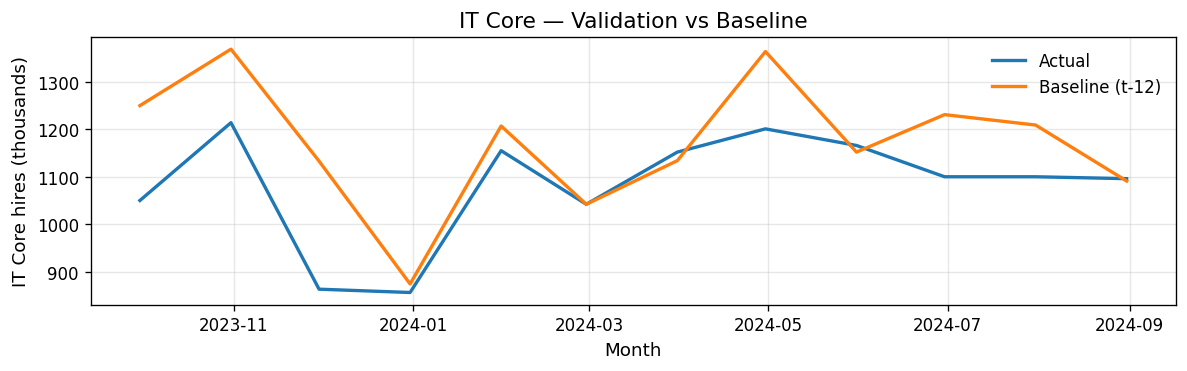

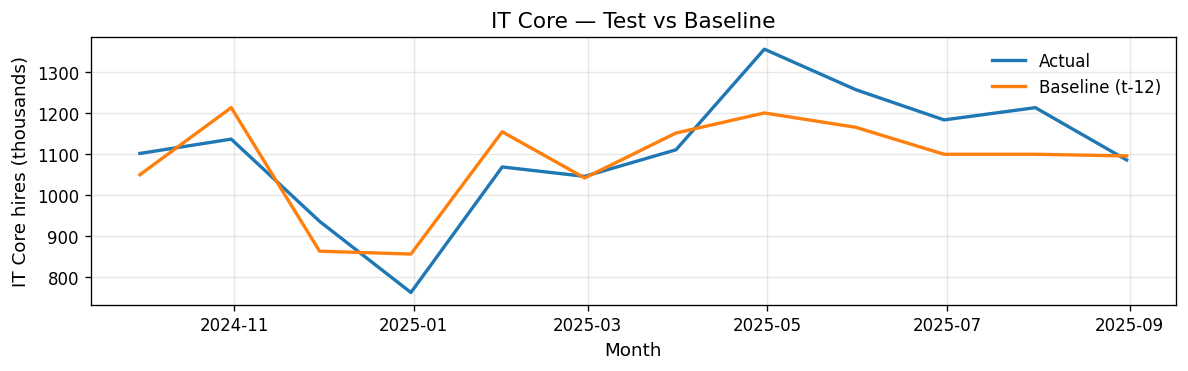

In [76]:
# ---- Quick plots ----
def plot_segment(seg_idx, title):
    fig, ax = plt.subplots(figsize=(10,3.2))
    ax.plot(y_all.loc[seg_idx].index, y_all.loc[seg_idx].values, label="Actual", lw=2)
    ax.plot(y_hat_all.loc[seg_idx].index, y_hat_all.loc[seg_idx].values, label="Baseline (t-12)", lw=2)
    ax.set_title(title); ax.set_ylabel("IT Core hires (thousands)"); ax.set_xlabel("Month")
    ax.legend(); ax.grid(alpha=0.3); plt.tight_layout(); plt.show()

plot_segment(val_idx,  "IT Core — Validation vs Baseline")
plot_segment(test_idx, "IT Core — Test vs Baseline")

# **SARIMAX (with macro drivers)**

In [79]:
# --- STEP 3a: SARIMAX with exogenous drivers (IT Core) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

def mae(y,yhat):   return float(np.mean(np.abs(y-yhat)))
def rmse(y,yhat):  return float(np.sqrt(np.mean((y-yhat)**2)))
def mape(y,yhat):
    y = np.asarray(y); yhat = np.asarray(yhat)
    mask = y != 0
    return float(np.mean(np.abs((yhat[mask]-y[mask])/y[mask]))*100)
def directional_accuracy(y, yhat):
    dy = np.sign(np.diff(y)); dyp = np.sign(np.diff(yhat))
    n = min(len(dy), len(dyp))
    return float(np.mean(dy[:n] == dyp[:n]))
def mase(y_true, y_pred, y_train, season=12):
    train = np.asarray(y_train)
    scale = np.mean(np.abs(train[season:] - train[:-season]))
    return float(np.mean(np.abs(np.asarray(y_true)-np.asarray(y_pred))) / scale)

# 1) Prepare data (ensure timeseries index)
df = model_df.copy().dropna(subset=["IT_Core"]).set_index("month").sort_index()

# Choose exogenous features (drop any with many NaNs)
exog_cols = ["indeed_index", "indpro_index", "claims_initial", "sp500_index"]
df = df.dropna(subset=exog_cols)

y = df["IT_Core"]
X = df[exog_cols]

# 2) Time split: 60/20/20
n = len(df)
n_train = int(n*0.60)
n_val   = int(n*0.20)
train_idx = df.index[:n_train]
val_idx   = df.index[n_train:n_train+n_val]
test_idx  = df.index[n_train+n_val:]

y_tr, y_val, y_te = y.loc[train_idx], y.loc[val_idx], y.loc[test_idx]

# scale exog by TRAIN stats only
mu, sigma = X.loc[train_idx].mean(), X.loc[train_idx].std().replace(0,1)
Xs = (X - mu) / sigma
X_tr, X_val, X_te = Xs.loc[train_idx], Xs.loc[val_idx], Xs.loc[test_idx]

print(f"Split sizes → train:{len(train_idx)}  val:{len(val_idx)}  test:{len(test_idx)}")
print(f"Train window: {train_idx.min().date()} → {train_idx.max().date()}")

# 3) Fit SARIMAX on TRAIN
order=(1,0,1); seasonal_order=(1,0,1,12)
mod = SARIMAX(endog=y_tr, exog=X_tr, order=order, seasonal_order=seasonal_order,
              enforce_stationarity=False, enforce_invertibility=False)
res = mod.fit(disp=False)

# 4) Forecast Val & Test (dynamic = True for genuine out-of-sample)
yhat_val = res.get_forecast(steps=len(val_idx), exog=X_val).predicted_mean
# update the state with val actuals before test forecast (rolling-origin)
res_updated = res.append(endog=y_val, exog=X_val, refit=False)
yhat_test = res_updated.get_forecast(steps=len(test_idx), exog=X_te).predicted_mean

# 5) Metrics (patched for pandas 2.0)
# for MASE scaling we can use the training series y_tr
metrics_val = {
    "MAE": mae(y_val, yhat_val),
    "RMSE": rmse(y_val, yhat_val),
    "MAPE%": mape(y_val, yhat_val),
    "MASE": mase(y_val, yhat_val, y_tr, season=12),
    "Directional_Accuracy": directional_accuracy(y_val.values, yhat_val.values),
}

metrics_test = {
    "MAE": mae(y_te, yhat_test),
    "RMSE": rmse(y_te, yhat_test),
    "MAPE%": mape(y_te, yhat_test),
    "MASE": mase(y_te, yhat_test, pd.concat([y_tr, y_val]), season=12),
    "Directional_Accuracy": directional_accuracy(y_te.values, yhat_test.values),
}

print("\nSARIMAX (1,0,1)(1,0,1,12) + exog — Validation")
print(pd.Series(metrics_val).round(2))
print("\nSARIMAX (1,0,1)(1,0,1,12) + exog — Test")
print(pd.Series(metrics_test).round(2))


Split sizes → train:28  val:9  test:10
Train window: 2021-10-31 → 2024-01-31


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



SARIMAX (1,0,1)(1,0,1,12) + exog — Validation
MAE                     459.90
RMSE                    541.86
MAPE%                    41.08
MASE                      2.03
Directional_Accuracy      0.62
dtype: float64

SARIMAX (1,0,1)(1,0,1,12) + exog — Test
MAE                     1187.71
RMSE                    1271.39
MAPE%                    106.80
MASE                       7.08
Directional_Accuracy       0.44
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


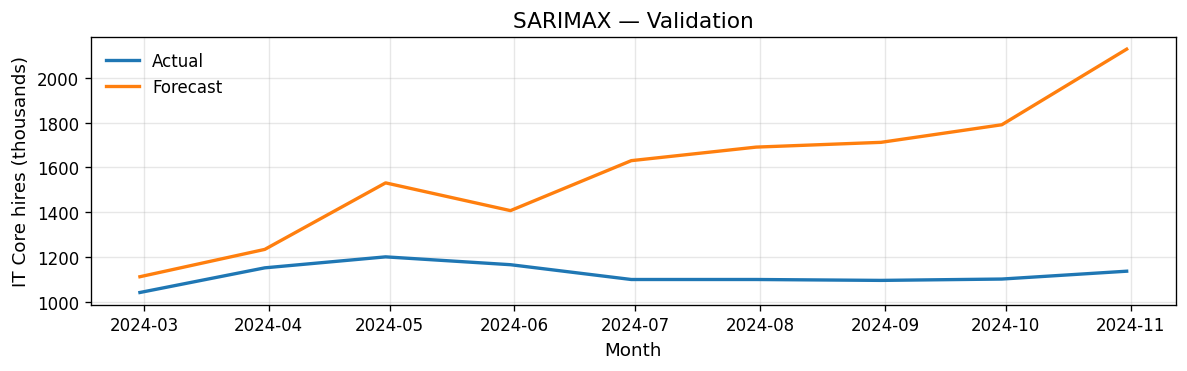

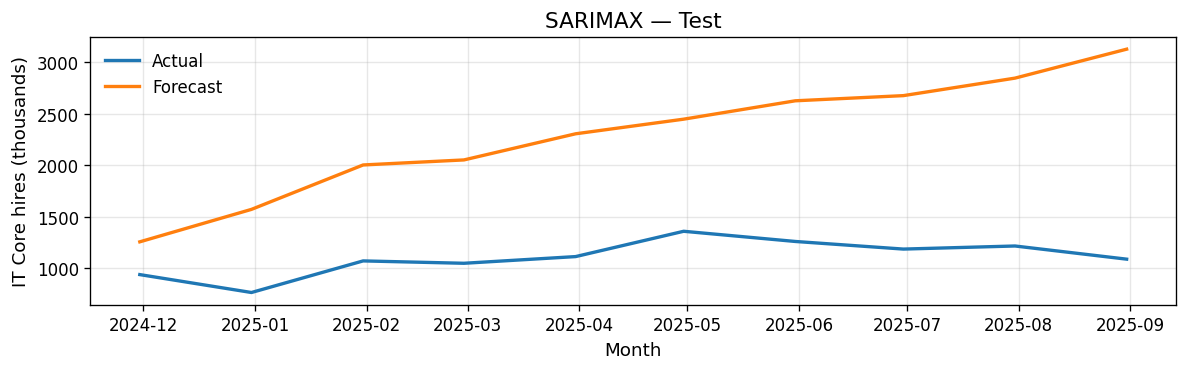

In [80]:
# 6) Plots
def plot_segment(idx, actual, pred, title):
    fig, ax = plt.subplots(figsize=(10,3.2))
    ax.plot(idx, actual.loc[idx], label="Actual", lw=2)
    ax.plot(idx, pred.loc[idx],   label="Forecast", lw=2)
    ax.set_title(title); ax.set_ylabel("IT Core hires (thousands)")
    ax.set_xlabel("Month"); ax.grid(alpha=0.3); ax.legend(); plt.tight_layout(); plt.show()

plot_segment(val_idx, y, yhat_val.reindex(val_idx),  "SARIMAX — Validation")
plot_segment(test_idx, y, yhat_test.reindex(test_idx), "SARIMAX — Test")

# **Non-seasonal ARIMA(1,1,1) with exogenous drivers**

In [82]:
# --- SARIMAX variant: simpler (1,1,1) + exog, no seasonal ---
order=(1,1,1); seasonal_order=(0,0,0,0)

mod = SARIMAX(endog=y_tr, exog=X_tr, order=order, seasonal_order=seasonal_order,
              enforce_stationarity=False, enforce_invertibility=False)
res = mod.fit(disp=False)

# Forecasts
yhat_val = res.get_forecast(steps=len(val_idx), exog=X_val).predicted_mean
res_updated = res.append(endog=y_val, exog=X_val, refit=False)
yhat_test = res_updated.get_forecast(steps=len(test_idx), exog=X_te).predicted_mean

# Metrics (reuse same block as before)
metrics_val = {
    "MAE": mae(y_val, yhat_val),
    "RMSE": rmse(y_val, yhat_val),
    "MAPE%": mape(y_val, yhat_val),
    "MASE": mase(y_val, yhat_val, y_tr, season=12),
    "Directional_Accuracy": directional_accuracy(y_val.values, yhat_val.values),
}
metrics_test = {
    "MAE": mae(y_te, yhat_test),
    "RMSE": rmse(y_te, yhat_test),
    "MAPE%": mape(y_te, yhat_test),
    "MASE": mase(y_te, yhat_test, pd.concat([y_tr, y_val]), season=12),
    "Directional_Accuracy": directional_accuracy(y_te.values, yhat_test.values),
}

print("\nSARIMAX (1,1,1) + exog — Validation")
print(pd.Series(metrics_val).round(2))
print("\nSARIMAX (1,1,1) + exog — Test")
print(pd.Series(metrics_test).round(2))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX (1,1,1) + exog — Validation
MAE                     77.18
RMSE                    85.96
MAPE%                    6.76
MASE                     0.34
Directional_Accuracy     0.50
dtype: float64

SARIMAX (1,1,1) + exog — Test
MAE                     146.58
RMSE                    187.32
MAPE%                    13.90
MASE                      0.87
Directional_Accuracy      0.11
dtype: float64


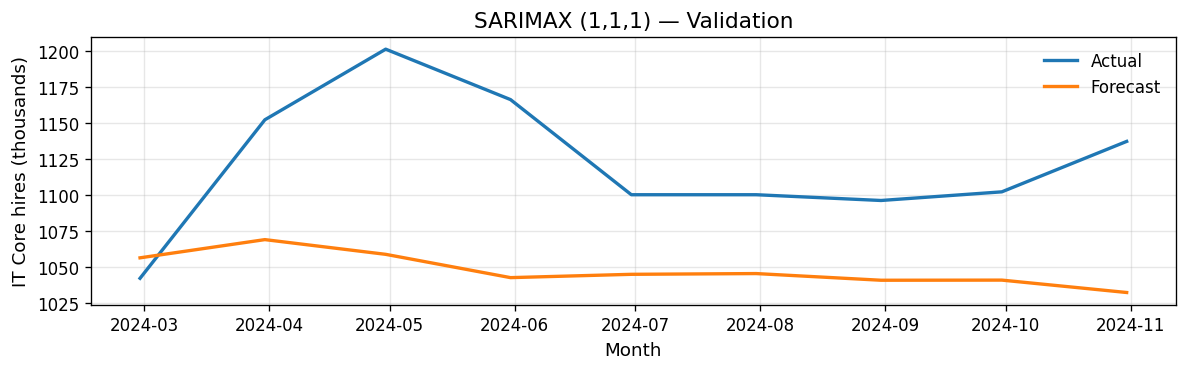

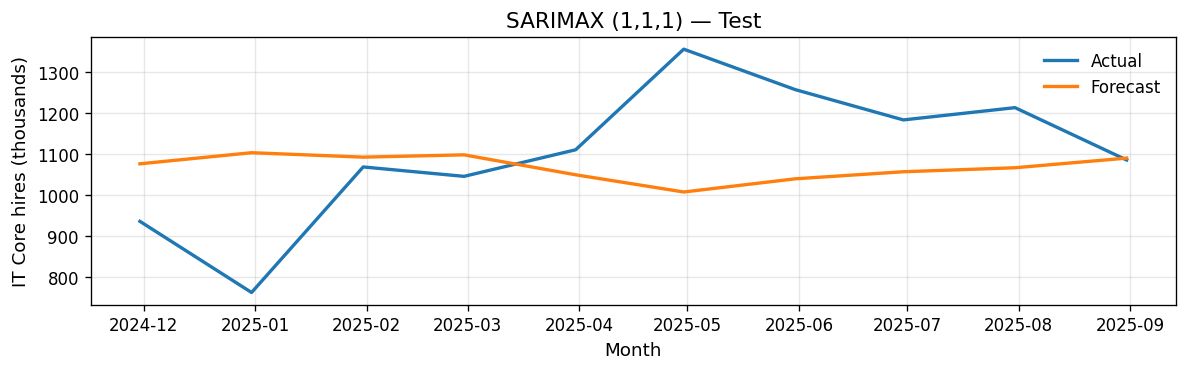

In [83]:
# Plots
plot_segment(val_idx, y, yhat_val.reindex(val_idx), "SARIMAX (1,1,1) — Validation")
plot_segment(test_idx, y, yhat_test.reindex(test_idx), "SARIMAX (1,1,1) — Test")